**Real Data Example:**
The study uses alcohol solubility data from Romanelli et al. The dependent variable is ln(Sol)exp (natural log of solubility in water). The dataset contains 44 observations of aliphatic alcohols. There are 6 independent variables:
**Log P (octanol-water partition coefficient) - measures hydrophobicity, P (polarizability), SAG (solvent-accessible surface-bounded molecular volume), Mass (M), RM (molar refractivity), V (volume)**

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/91959/Desktop/CODE'
                '/Robust-Penalized-Empirical-Likelihood-Estimation-Method-for-Linear-Regression/Data/Alcohol.csv')

X = df.drop(['Alcohol', 'ln (Sol)exp'], axis=1)
y = df['ln (Sol)exp']

In [3]:
# 1. Dataset Description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Alcohol      44 non-null     object 
 1   SAG          44 non-null     float64
 2   V            44 non-null     float64
 3   Log P        44 non-null     float64
 4   P            44 non-null     float64
 5   RM           44 non-null     float64
 6   Mass         44 non-null     float64
 7   ln (Sol)exp  44 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.9+ KB


In [4]:
# 2. Basic Statistical Summary
df.describe()

,SAG,V,Log P,P,RM,Mass,ln (Sol)exp
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,337.788864,509.640455,2.254318,14.883409,37.327727,120.985909,-3.710564
std,74.011456,128.593538,0.940693,4.316224,10.847843,32.992404,3.284330
min,247.550000,344.910000,0.940000,8.750000,21.950000,74.120000,-14.614020
25%,290.382500,429.655000,1.677500,12.420000,31.065000,102.180000,-5.615712
50%,312.345000,471.965000,2.050000,14.260000,35.635000,116.200000,-2.752595
75%,371.282500,565.057500,2.865000,17.930000,44.787500,144.260000,-1.543848
max,587.000000,938.540000,5.300000,28.940000,72.750000,228.420000,0.338610


In [5]:
# 3. Correlation Analysis
correlation_matrix = df.drop('Alcohol', axis=1).corr()
correlation_matrix

,SAG,V,Log P,P,RM,Mass,ln (Sol)exp
SAG,1.000000,0.997048,0.973976,0.978384,0.980033,0.978402,-0.986840
V,0.997048,1.000000,0.986253,0.991123,0.992075,0.991134,-0.988882
Log P,0.973976,0.986253,1.000000,0.993428,0.992425,0.993425,-0.980229
P,0.978384,0.991123,0.993428,1.000000,0.999810,1.000000,-0.978261
RM,0.980033,0.992075,0.992425,0.999810,1.000000,0.999811,-0.979391
Mass,0.978402,0.991134,0.993425,1.000000,0.999811,1.000000,-0.978286
ln (Sol)exp,-0.986840,-0.988882,-0.980229,-0.978261,-0.979391,-0.978286,1.000000


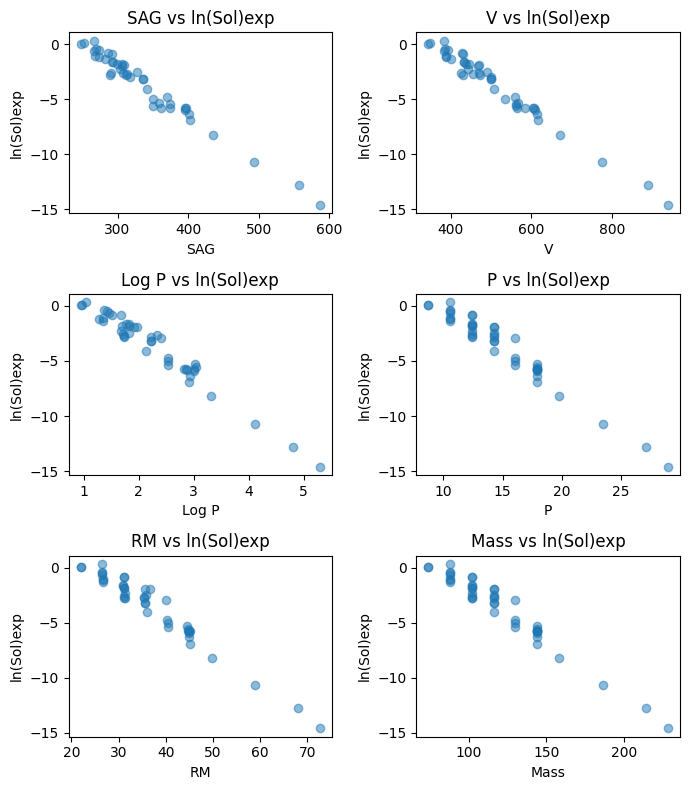

In [6]:
# 4. Feature distributions and their relationships with target

fig, axes = plt.subplots(3, 2, figsize=(7, 8))
axes = axes.ravel()

for idx, column in enumerate(X.columns):
    # Scatter plot against target
    axes[idx].scatter(X[column], y, alpha=0.5)
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('ln(Sol)exp')
    axes[idx].set_title(f'{column} vs ln(Sol)exp')

plt.tight_layout()
plt.show()

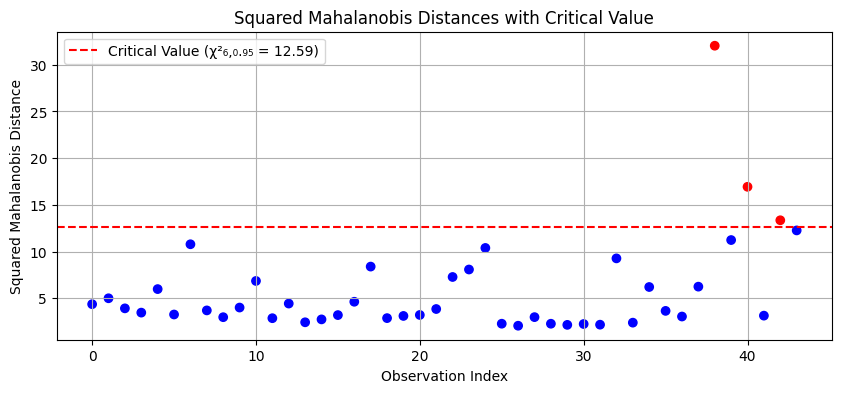


Detected Outliers (MD² > χ²₆,₀.₉₅):
                   Alcohol  MD_squared
38      3-Ethyl-3-pentanol   32.027452
40  2,2-Diethyl-1-pentanol   16.932877
42          1-Tetradecanol   13.352777

Total number of observations: 44
Number of outliers detected: 3
Percentage of outliers: 6.8%


In [7]:
# 5. Calculating Mahalanobis Distance for outlier detection

# Calculate mean vector and covariance matrix
mean_vector = np.mean(X, axis=0)
covariance_matrix = np.cov(X.T)

# Calculate inverse of covariance matrix
inv_covariance_matrix = np.linalg.inv(covariance_matrix)

# Calculate Mahalanobis distance for each point
mahalanobis_distances = []
n = len(X)
p = X.shape[1]  # number of variables

for i in range(n):
    x_i = X.iloc[i, :]
    diff = x_i - mean_vector
    md = np.sqrt(diff.dot(inv_covariance_matrix).dot(diff))
    mahalanobis_distances.append(md)

# Calculate squared distances
md_squared = np.array(mahalanobis_distances) ** 2

# Calculate critical value
critical_value = chi2.ppf(0.95, p)  # 95% confidence level with p degrees of freedom

# Identify outliers
outliers = pd.DataFrame({
    'Alcohol': df['Alcohol'],
    'MD_squared': md_squared,
    'is_outlier': md_squared > critical_value
})

# Plot the results
plt.figure(figsize=(10, 4))
plt.scatter(range(len(outliers)), outliers['MD_squared'],
        c=['red' if x else 'blue' for x in outliers['is_outlier']])
plt.axhline(y=critical_value, color='r', linestyle='--',
        label=f'Critical Value (χ²₆,₀.₉₅ = {critical_value:.2f})')
plt.xlabel('Observation Index')
plt.ylabel('Squared Mahalanobis Distance')
plt.title('Squared Mahalanobis Distances with Critical Value')
plt.legend()
plt.grid(True)
plt.show()

# Print outlier details
print("\nDetected Outliers (MD² > χ²₆,₀.₉₅):")
print(outliers[outliers['is_outlier']][['Alcohol', 'MD_squared']].sort_values('MD_squared', ascending=False))

# Print summary statistics
print(f"\nTotal number of observations: {len(outliers)}")
print(f"Number of outliers detected: {sum(outliers['is_outlier'])}")
print(f"Percentage of outliers: {(sum(outliers['is_outlier'])/len(outliers))*100:.1f}%")